In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Acer/Downloads/creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(df["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


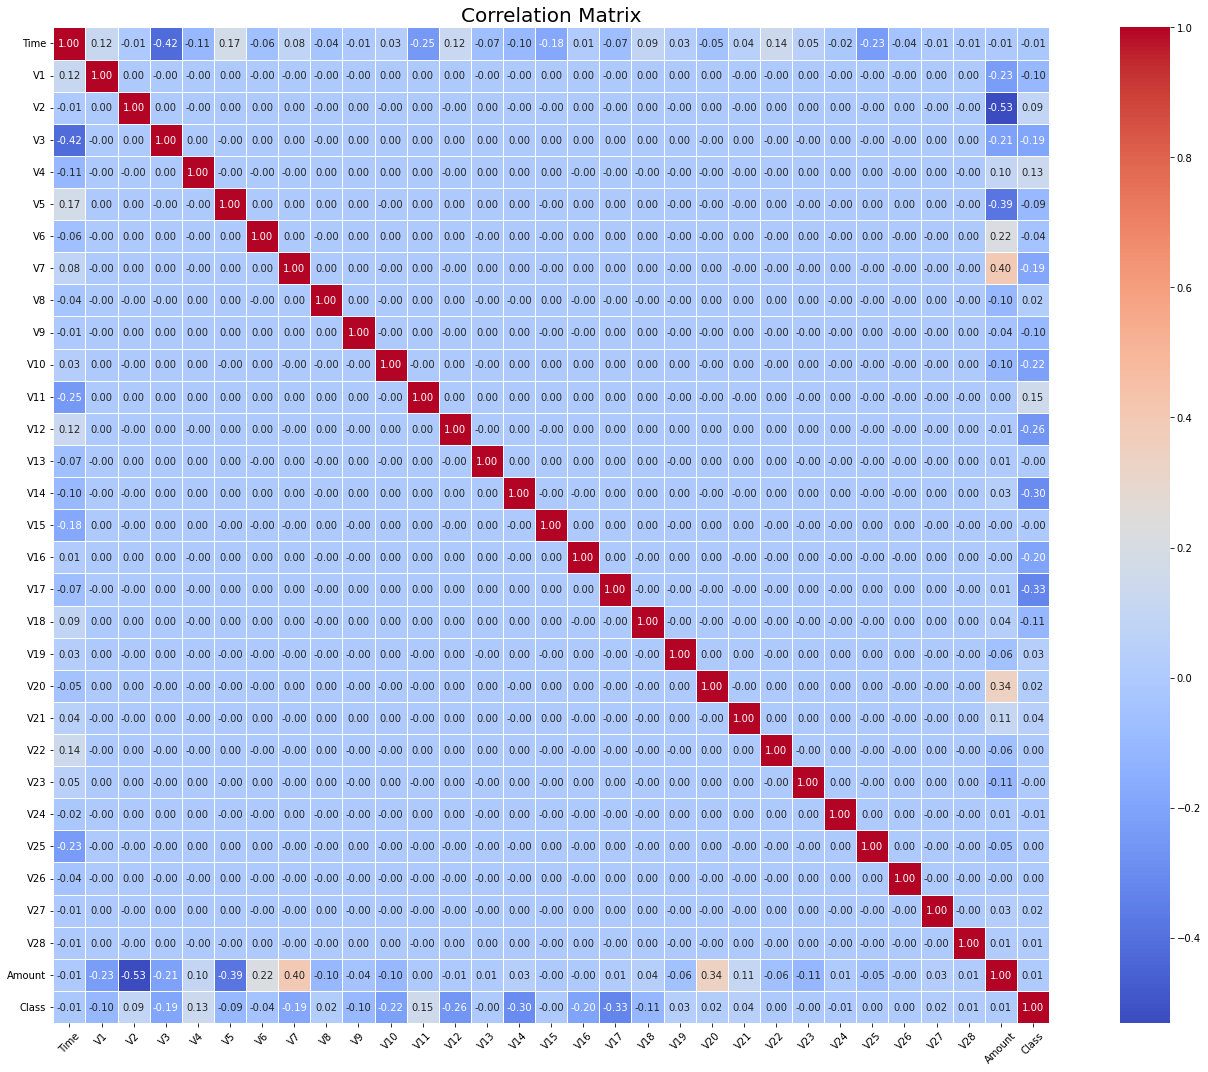

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))  # Make the figure much larger
correlation = df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", 
            linewidths=0.5, square=True, cbar=True)

plt.title("Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
y = df["Class"]
X = df.drop(["Class", "Amount", "Time"], axis=1) #I’m currently focusing on anonymized features (V1–V28) for consistency
"""I dropped the Amount feature only after verifying that it had minimal impact on model accuracy and had very low correlation with the target variable. In other cases, if used with logistic regression or SVM, it should be scaled due to its wide range."""

'I dropped the Amount feature only after verifying that it had minimal impact on model accuracy and had very low correlation with the target variable. In other cases, if used with logistic regression or SVM, it should be scaled due to its wide range.'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify=y)
model = LogisticRegression(class_weight= {0:1, 1:50})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 50})

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[28377,    55],
       [    5,    44]], dtype=int64)

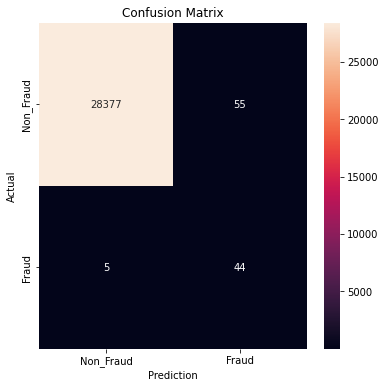

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Non_Fraud', 'Fraud']
plt.figure(figsize = (6,6))
sns.heatmap(con_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [11]:
model.classes_

array([0, 1], dtype=int64)

In [12]:
model.coef_

array([[ 0.11077592, -0.06859069, -0.01967696,  0.88409344,  0.09144915,
        -0.18473897,  0.05203225, -0.36027874, -0.1543006 , -0.61276151,
         0.23644341, -0.58795584, -0.39928999, -0.67522941, -0.11132962,
        -0.42065113, -0.09667066, -0.03722182, -0.09650186, -0.12984166,
         0.29407768,  0.52342799, -0.18790098,  0.00292142,  0.00887645,
        -0.42029811, -0.13369595,  0.03408903]])

In [13]:
model.intercept_

array([-5.61540575])

In [14]:
model.predict_proba(X_test)

array([[0.98667522, 0.01332478],
       [0.99558961, 0.00441039],
       [0.99587779, 0.00412221],
       ...,
       [0.99220802, 0.00779198],
       [0.99792357, 0.00207643],
       [0.994318  , 0.005682  ]])

In [15]:
!pip install shap

In [16]:
import shap
shap.initjs
explainer = shap.Explainer(model, X_train)

In [17]:
values = explainer(X_test)

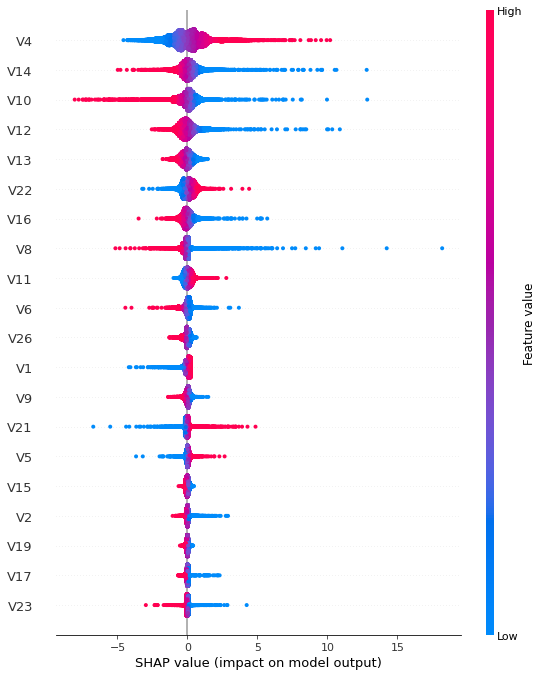

In [18]:
plotting = shap.summary_plot(values, X_test)

In [19]:
X_xgb = df.drop(['Class', 'Time', 'Amount'], axis=1)
y_xgb = df['Class']

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size = 0.1, random_state = 42, stratify=y_xgb)
model1 = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
model1.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
y_pred_xgb = model1.predict(X_test_xgb)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
conf_matrix_xgb

array([[28429,     3],
       [    6,    43]], dtype=int64)

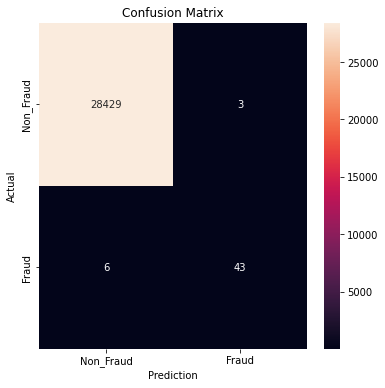

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Non_Fraud', 'Fraud']
plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [24]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.17.3 in c:\users\acer\appdata\local\programs\python\python37\lib\site-packages (from imbalanced-learn) (1.21.6)



In [25]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)

<class 'pandas.core.frame.DataFrame'> (256326, 28)
<class 'pandas.core.series.Series'> (256326,)


In [27]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Let's check the new count
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 255883, 1: 443})
After SMOTE: Counter({0: 255883, 1: 255883})


In [28]:
model = LogisticRegression(class_weight=None)  # Remove class weights if using SMOTE
model.fit(X_train_smote, y_train_smote)

y_pred_smote = model.predict(X_test)  # Still test on the original test set (not resampled)

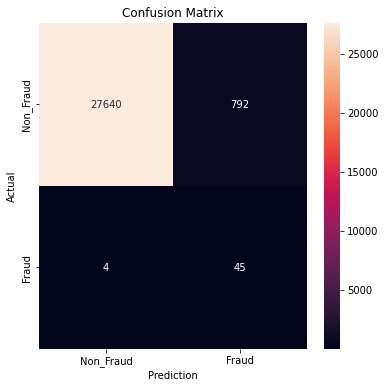

In [29]:
from sklearn.metrics import confusion_matrix
con_matrix_smote = confusion_matrix(y_test, y_pred_smote)
con_matrix_smote
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Non_Fraud', 'Fraud']
plt.figure(figsize = (6,6))
sns.heatmap(con_matrix_smote, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [30]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=LABELS))

Accuracy: 0.9978933323970366
              precision    recall  f1-score   support

   Non_Fraud       1.00      1.00      1.00     28432
       Fraud       0.44      0.90      0.59        49

    accuracy                           1.00     28481
   macro avg       0.72      0.95      0.80     28481
weighted avg       1.00      1.00      1.00     28481



In [31]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print(classification_report(y_test_xgb, y_pred_xgb, target_names=LABELS))

Accuracy: 0.9996839998595555
              precision    recall  f1-score   support

   Non_Fraud       1.00      1.00      1.00     28432
       Fraud       0.93      0.88      0.91        49

    accuracy                           1.00     28481
   macro avg       0.97      0.94      0.95     28481
weighted avg       1.00      1.00      1.00     28481



In [32]:
y_scores = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Fraud)

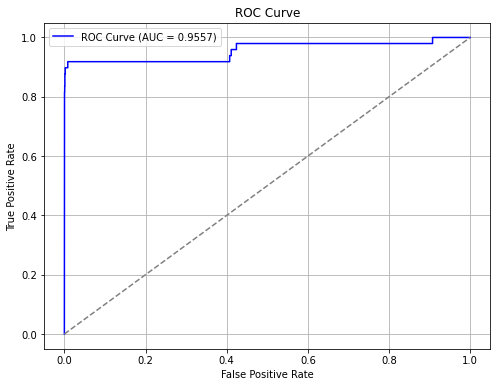

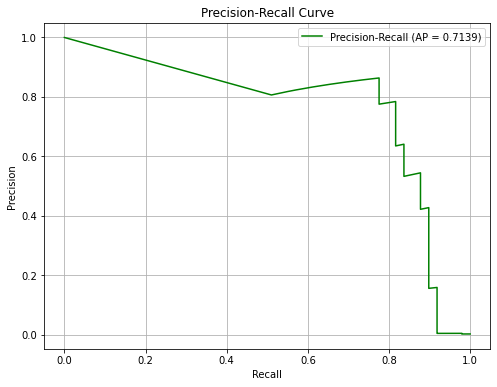

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt

# Get probability scores for class 1 (Fraud)
y_scores = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision:.4f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
y_scores_xgb = model.predict_proba(X_test_xgb)[:, 1]  # Probability of class 1 (Fraud)

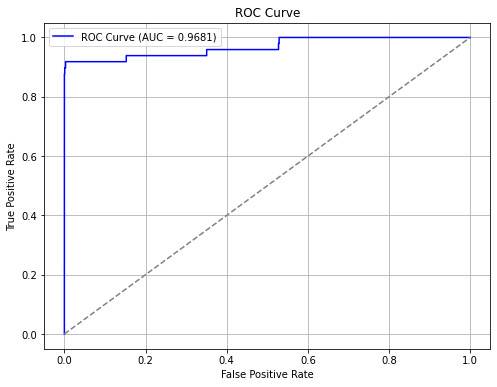

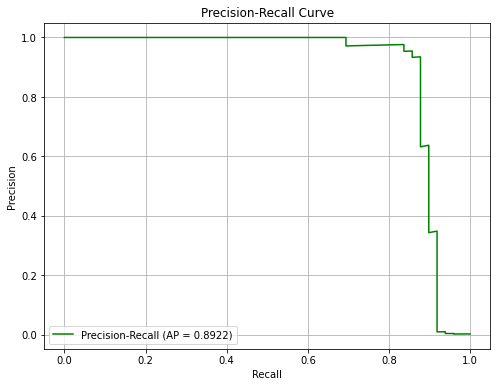

In [35]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt

# Get probability scores for class 1 (Fraud)
y_scores_xgb = model1.predict_proba(X_test_xgb)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_scores_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test_xgb, y_scores_xgb)
average_precision = average_precision_score(y_test_xgb, y_scores_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision:.4f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
import joblib
joblib.dump(model1, 'model.pkl')  # Save XGBoost

['model.pkl']